In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns #for plotting

import dame_flame
import random
np.random.seed(1) #ensure reproducibility


pd.options.mode.chained_assignment = None

In [43]:
# Data on Ridership, where total_boardings is the number of boardings of a specific card_id on King County Metro.

In [93]:
clean_ridership_path = "flame_boardings.csv"
df_clean_ridership = pd.read_csv(clean_ridership_path)
df_clean_ridership = df_clean_ridership.iloc[:,1:]
df_clean_ridership


,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,stage,Age_bin,total_boardings
0,0,4,3,1,1,2,0,0,0,2,3,1.0
1,0,4,3,1,1,2,0,0,0,3,4,14.0
2,0,4,3,1,1,2,0,0,0,2,4,0.0
3,3,4,3,1,1,2,0,0,2,2,2,0.0
4,2,4,3,1,1,2,0,0,0,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13543,1,2,2,1,1,3,0,1,0,1,3,0.0
13544,5,1,2,1,1,3,0,1,0,1,3,0.0
13545,0,1,2,1,1,3,0,1,0,1,0,0.0
13546,0,1,2,2,3,3,1,2,0,1,0,0.0


In [120]:
df_clean_ridership.query("Access30Transit_D == 4")

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,stage,Age_bin,total_boardings
5,1,1,2,4,4,3,1,0,0,2,3,807.0
6,1,1,2,4,4,3,1,0,0,1,5,0.0
7,1,1,2,4,4,3,1,0,0,1,5,110.0
8,1,1,2,4,4,3,1,0,0,2,5,0.0
9,1,1,2,4,4,3,1,0,0,2,5,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13517,4,3,3,4,3,2,0,0,0,1,1,0.0
13518,0,1,3,4,4,3,0,1,0,1,2,0.0
13524,0,1,4,4,4,4,0,0,0,1,4,0.0
13532,1,3,2,4,3,2,1,2,0,1,4,0.0


## Run FLAME for matching.

In [123]:
model_flame_AMT = dame_flame.matching.FLAME(repeats=False, 
                                            verbose=3, 
                                            early_stop_iterations=30, 
                                            stop_unmatched_t = True, 
                                            adaptive_weights='decisiontree', 
                                            want_pe=True)

In [124]:
model_flame_AMT.fit(holdout_data=False, 
                    treatment_column_name='SAP', 
                    outcome_column_name='total_boardings')

result_flame_AMT = model_flame_AMT.predict(df_clean_ridership)

Completed iteration 0 of matching
	Number of matched groups formed in total:  459
	Unmatched treated units:  3912 out of a total of  4973 treated units
	Unmatched control units:  7601 out of a total of  8575 control units
	Number of matches made this iteration:  2035
	Number of matches made so far:  2035
	Covariates dropped so far:  set()
	Predictive error of covariate set used to match:  7966.646081579584
Completed iteration 1 of matching
	Number of matched groups formed in total:  527
	Unmatched treated units:  3809 out of a total of  4973 treated units
	Unmatched control units:  7523 out of a total of  8575 control units
	Number of matches made this iteration:  181
	Number of matches made so far:  2216
	Covariates dropped so far:  Access30Transit_ts_D
	Predictive error of covariate set used to match:  8056.007559905735
Matching stopped while attempting iteration 2 due to the PE fraction early stopping criterion.
	Predictive error of covariate set would have been 8420.256078416483


/var/folders/41/z5_zslwx5w5gsn9clwq01bpc0000gn/T/ipykernel_29959/1360871685.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=x, rotation=90)


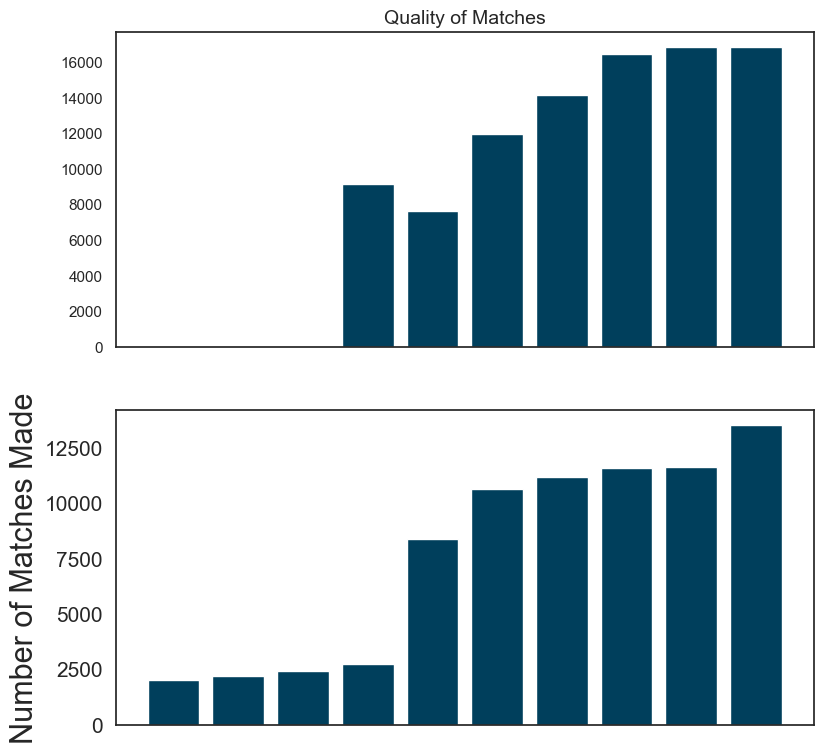

In [96]:
# Figure Visualzing Qualit of Matches (i.e. Match Group Size vs. Covariates Matched on.)
x = ["NONE", "Access30Transit_ts", '+Language', '+lowwagelaborforce', '+Agency', '+Age_bin', '+OverallJobAccess', '+Access30Transit', '+spatialmismatch', 'stage']
y1 = [0, 0, 0, 9130, 7614, 11950, 14126, 16455, 16815, 16854] # some of these will be repeat matches already made earlier iterations.
y2 = [2035, 2216, 2412, 2749, 8372, 10630, 11201, 11579, 11619, 13548]


f, ax = plt.subplots(ncols = 1, nrows = 2, gridspec_kw = {'width_ratios':[.51]}, figsize=(9,9))
# ax[0].set_ylabel('Number of Matches in Iteration', fontsize=14)
ax[0].set_xticklabels(labels=x, rotation=90)
ax[0].set_xlabel('Covariate(s) Dropped', fontsize=14)
ax[0].set_title('Quality of Matches', fontsize=14)
ax[0].bar(x,y1, color = '#003f5c')
ax[0].axes.xaxis.set_visible(False)

ax[1].set_ylabel('Number of Matches Made', fontsize=22)
ax[1].set_xlabel('Covariate(s) Dropped', fontsize=30)
# ax[1].set_title('Quality of Matches', fontsize=30)
ax[1].bar(x,y2, color = '#003f5c')
ax[1].tick_params(axis="y", labelsize=15)
ax[1].axes.xaxis.set_visible(False)


In [97]:
matched = model_flame_AMT.df_units_and_covars_matched
matched # covariates dropped according to predicting total_boardings

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,Agency,Language,stage,Age_bin
5,1.0,1.0,2.0,4.0,4.0,3.0,0.0,0.0,2.0,3.0
13,6.0,1.0,2.0,4.0,4.0,3.0,0.0,0.0,2.0,2.0
16,1.0,1.0,2.0,4.0,4.0,3.0,0.0,0.0,2.0,3.0
17,1.0,1.0,2.0,4.0,4.0,3.0,0.0,0.0,2.0,3.0
18,0.0,1.0,2.0,4.0,4.0,3.0,0.0,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...
13421,4.0,4.0,4.0,2.0,*,3.0,0.0,0.0,1.0,2.0
13422,0.0,3.0,2.0,2.0,*,2.0,0.0,0.0,2.0,1.0
13498,0.0,1.0,2.0,4.0,4.0,3.0,4.0,0.0,1.0,0.0
13539,0.0,2.0,1.0,2.0,*,2.0,0.0,0.0,1.0,4.0


In [98]:
# ATE Estimate
ate_ridership = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_ridership

52.41957322074402

## Create Scatterplots of Matched Groups.

In [99]:
def create_df_scatter(feature, category):
    '''
    Creates a scatter plot of the size of matched group against CATE estimate.
    
    feature (str): variable of interest.
    category (int): level of variable to highlight.
    '''
    group_size_overall = []
    cate_of_group = []
    in_desired_variable = []
    size_desired_group = []
    cate_desired_group = []
    

    for group in model_flame_AMT.units_per_group:

        # find len of just treated units
        df_mmg = df_clean_ridership.loc[group] # chooses rows with row id in group.
        treated = df_mmg.loc[df_mmg["SAP"] == 1] # chooses the rows with treatment = 1
        desired_variable = df_mmg.iloc[0][feature] == category # true/false vector. an indicator.

        # group_size_treated.append(len(treated))
        group_size_overall.append(len(group))
        in_desired_variable.append(desired_variable)
        
        

        cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
        
        if desired_variable == True:
            cate_desired_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
            size_desired_group.append(len(group))
        
    
    return(group_size_overall, cate_of_group, in_desired_variable, size_desired_group, cate_desired_group)

In [100]:
def create_cate_lst(sizes, cates):
    '''
    helper function to create credible interval for ATE. Creates an extended list
    where each element is the CATE for a unit.'''
    
    out = []
    for i in range(len(cates)):
        for j in range(sizes[i]):
            out.append(cates[i])
    return out   

In [101]:
# Calculate the quantiles for ATE.
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

cate_lst = create_cate_lst(size, cate_all)

Text(0, 0.5, 'CATE')

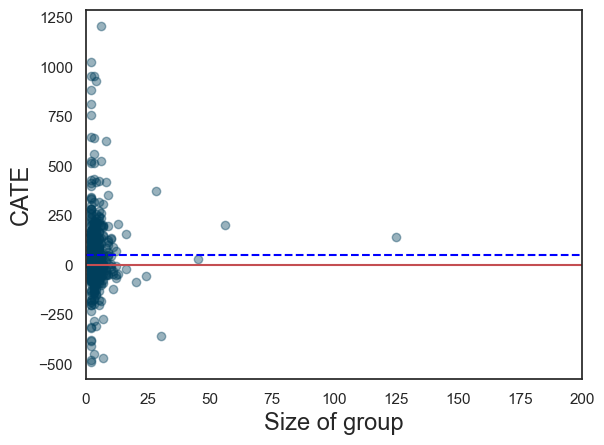

In [102]:
# Scatter Plot for CATE
cors = {True:"green", False:"green"}
 #hisp = pd.Series(in_hisp)

plt.scatter(size, cate_all, c = "#003f5c", alpha=0.4)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=ate_ridership, color='blue', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
# plt.title("Visualizing Enrollment CATE of matched groups by size", fontsize=14)

plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('ate_scatter.pdf', bbox_inches="tight")

### Conditional Average Treatment Effects By Race, Access to Transit

In [103]:
# race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)



In [104]:
## Conf. Interval for Asian CATE estimates
cate_lst = create_cate_lst(size_asian, cate_asian)
mean_cate_asian = sum(cate_lst)/len(cate_lst)
mean_cate_asian

74.98809553230213

Text(0, 0.5, 'CATE')

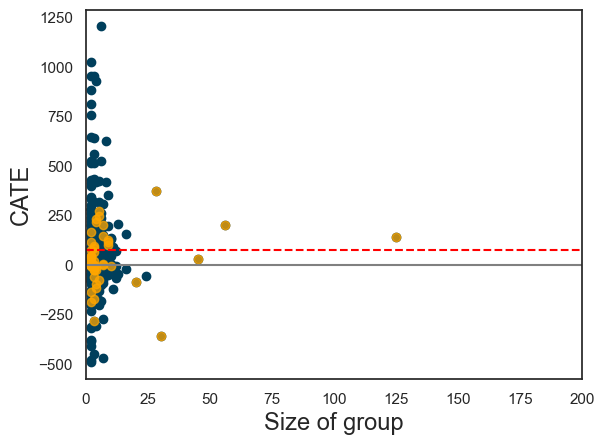

In [105]:
# Scatter Plots displaying the CATEs for matched groups with Asian individuals

cors = {True:'#bc5090', False:'#ffa600'}
asian = pd.Series(in_asian)

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_asian, cate_asian, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=mean_cate_asian, color='red', linestyle='--')

plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('asian_ridership.pdf', bbox_inches="tight")

In [106]:
# race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
# Hispanic
(size, cate_all, in_hisp, size_hispanic, cate_hispanic) = create_df_scatter("RaceDesc", 3)


In [107]:
## mean cate hispanic race
cate_hispanic_lst = create_cate_lst(size_hispanic, cate_hispanic)
mean_cate_h = sum(cate_hispanic_lst)/len(cate_hispanic_lst)
mean_cate_h

67.9931506849315

Text(0, 0.5, 'CATE')

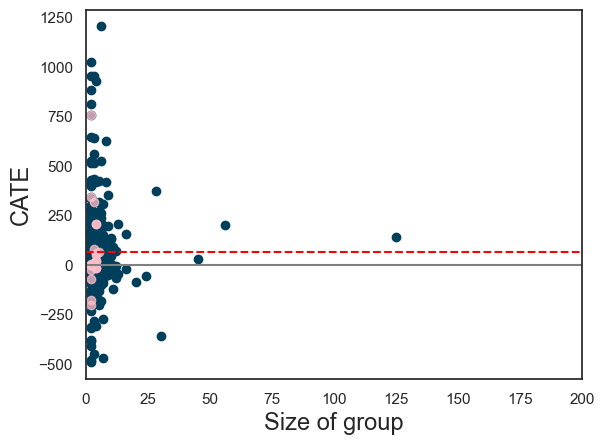

In [108]:
# Scatter plot Hispanic Individuals.

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_hispanic, cate_hispanic, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='gray', linestyle='-')
plt.axhline(y=mean_cate_h, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('hispanic_ridership.pdf', bbox_inches="tight")

In [109]:
# race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
# White
(size, cate_all, in_hisp, size_white, cate_white) = create_df_scatter("RaceDesc", 0)


In [110]:
## mean cate white race
cate_w_lst = create_cate_lst(size_white, cate_white)
mean_cate_w = sum(cate_w_lst)/len(cate_w_lst)
mean_cate_w

31.734488358213692

Text(0, 0.5, 'CATE')

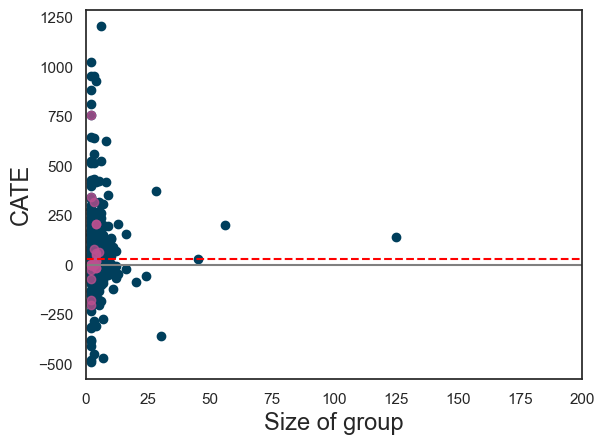

In [111]:
# Scatter plot Hispanic Individuals.

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_hispanic, cate_hispanic, c = "#bc5090", alpha=.75)

plt.axhline(y=0.0, color='gray', linestyle='-')
plt.axhline(y=mean_cate_w, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('white_ridership.pdf', bbox_inches="tight")

### Overall Job Access

In [112]:
(size, cate_all, in_access_one, size_access_one, cate_access_one) = create_df_scatter("OverallJobAccess_D", 1)



In [113]:
## mean cate lowest access to transit
cate_transit1_lst = create_cate_lst(size_access_one, cate_access_one)
mean_transit1_cate = sum(cate_transit1_lst)/len(cate_transit1_lst)
mean_transit1_cate

45.854901960784304

In [114]:
matplotlib.rcParams.update({'font.size': 14})

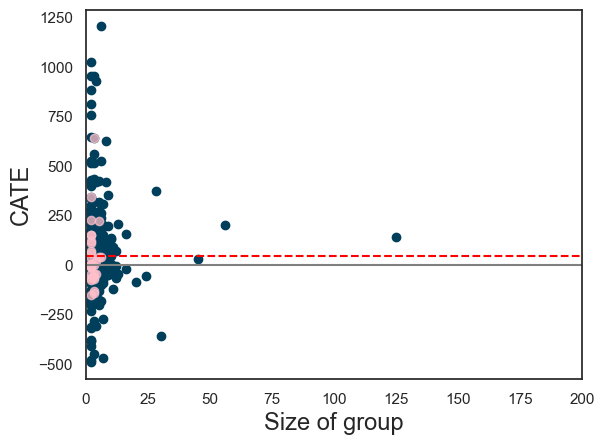

In [115]:
# Scatter plot ("Access30Transit_D", 1) people with Bottom 25% access to transit.

# plot
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_access_one, cate_access_one, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='gray', linestyle='-')
plt.axhline(y=mean_transit1_cate, color='red', linestyle='--')
plt.xlim(0,200)

plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

plt.savefig('job_bottom_ridership.pdf', bbox_inches="tight")

In [116]:
(size, cate_all, in_access_four, size_access_four, cate_access_four) = create_df_scatter("OverallJobAccess_D", 3)



In [117]:
## mean cate highest access to transit
cate_transit4_lst = create_cate_lst(size_access_four, cate_access_four)
mean_transit4_cate = sum(cate_transit4_lst)/len(cate_transit4_lst)
mean_transit4_cate

33.20148148148149

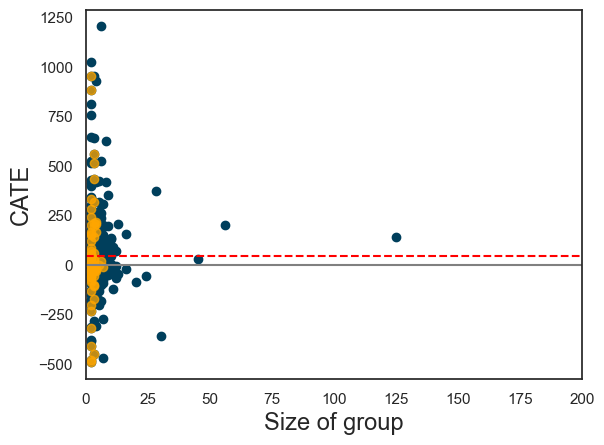

In [118]:
# Scatter plot ("Access30Transit_D", 1) people with Top 25% access to transit.

# plot
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_access_four, cate_access_four, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='gray', linestyle='-')
plt.axhline(y=mean_transit1_cate, color='red', linestyle='--')
plt.xlim(0,200)

plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

plt.savefig('job_top_ridership.pdf', bbox_inches="tight")

In [119]:
def compute_cates(column_name: str) -> dict:
    """
    Return dictionary where
    - the dictionary keys are a value in a column (i.e. Asian) and 
    - the dictionary value are the CATEs for all the units that have that value in the column (i.e. race=Asian) 
    """
    cates = {}
    cates_avg = {}
    for val in set(matched[column_name].tolist()):
        cates[val] = []
        print(f'Calculating cates for column: {column_name}, for value: {val}')
        for i in matched[(matched[column_name] == val)].index:
            cates[val].append(dame_flame.utils.post_processing.CATE(model_flame_AMT, i))
        cates_avg[val] = sum(cates[val]) / len(cates[val])
    return cates_avg

def get_cates_and_counts(column_name: str) -> pd.DataFrame:
    """
    Return pd DataFrame with CATE values and Count Values to plot both
    
    - 'CATE' column has CATE value corresponding to all the units with that value in the column
    - 'Counts' column has the number of all units in the data that are matched to a group that 
    has that specific value, i.e. 1791 individuals/units with matched in a group such that race=White
    """
    cates_avg = compute_cates(column_name)
    cates_avg_series = pd.Series(cates_avg)
    
    num_lvls = matched[column_name].value_counts()
    frame = {'CATE': cates_avg_series, 
             'Counts': num_lvls}
    data = pd.DataFrame(frame)
    data.index = data.index.map(str)
    data = data.sort_index() 
    return data

# non-response columns: 
cols = ['RaceDesc', 'OverallJobAccess_D', 'lowwagelaborforce_D', 'Access30Transit_D', 'Access30Transit_ts_D', 'spatialmismatch_D', 'Agency', 'Language', 'stage', 'Age_bin']

df_dic = {}

def export_cate_df(cols: list): 
    """
    Create dictionary where
    - keys are column (i.e. White)
    - values are pandas dataframe (i.e. pandas dataframe created using get_cates_and_counts() that shows CATE
    values and counts)
    """
    for col in cols:
        df_dic[col] = get_cates_and_counts(col)

export_cate_df(cols)


Calculating cates for column: RaceDesc, for value: 0.0
Calculating cates for column: RaceDesc, for value: 1.0
Calculating cates for column: RaceDesc, for value: 2.0
Calculating cates for column: RaceDesc, for value: 3.0
Calculating cates for column: RaceDesc, for value: 4.0
Calculating cates for column: RaceDesc, for value: 5.0
Calculating cates for column: RaceDesc, for value: 6.0
Calculating cates for column: RaceDesc, for value: 7.0
Calculating cates for column: OverallJobAccess_D, for value: 1.0
Calculating cates for column: OverallJobAccess_D, for value: 2.0
Calculating cates for column: OverallJobAccess_D, for value: 3.0
Calculating cates for column: OverallJobAccess_D, for value: 4.0
Calculating cates for column: lowwagelaborforce_D, for value: 1.0
Calculating cates for column: lowwagelaborforce_D, for value: 2.0
Calculating cates for column: lowwagelaborforce_D, for value: 3.0
Calculating cates for column: lowwagelaborforce_D, for value: 4.0
Calculating cates for column: lowwag

In [90]:
def plot_column_CATE(column, title=None, xaxistitle=None, rename_dic=None) -> None:
    """
    Generalized function that plots the CATE and counts for everything in a particular column, i.e. 
    "race". Must run previous helper functions for this to work. 
    
    Takes:
    - column - column name
    - title - plot title
    - xaxistitle - x axis title 
    
    Returns:
    - None
    
    """
    
    if title ==None: 
        title = column + " CATE on Ridership"
        
    df = df_dic[column]
    
    df = df.rename(index={'*': 'Unmatched'})
    
    if rename_dic != None: 
        df = df.rename(index=rename_dic)
    
    df = df.sort_values('CATE', ascending=False)
    df.plot.bar(rot=0, subplots=True, fontsize = 20)
    sns.set_theme(style="white")
    
    plt.xlabel(xaxistitle)
    
    #plt.subplots_adjust(top=0.85)
    #plt.gcf().subplots_adjust(bottom=0.20)

    plt.suptitle(title, fontweight='bold')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.savefig('Ridership_CATE_' + column + '.png')
    

    return df

In [91]:
dic_race_rename = {'0.0': 'White',
            '1.0': 'Black',
            '2.0': 'Asian',
            '3.0': 'Hispanic',
            '4.0': 'Not Specified',
            '5.0': 'Other',
            '6.0': 'American Indian',
            '7.0': 'Multi-Racial',
            '8.0': 'Pacific Islander',
            '*': 'Umatched'}

dic_language_rename = {"0.0":"English", 
                       "1.0":"Chinese", 
                       "2.0":"Spanish", 
                       "3.0":"Dari", 
                       "4.0":"Vietnamese", 
                       "5.0":'Other'}

dic_agency_rename = {"0.0":"King County Public Health", 
     "1.0":"DSHS - ORCA LIFT (remote enrollment)", 
     "2.0":"DSHS - subsidized annual pass (remote enrollment)", 
     "3.0":"CCS", 
     "4.0":"KCMCCS", 
     "5.0":'Other'}

,CATE,Counts
4.0,59.330025,1844
2.0,29.487952,83
3.0,22.453137,404
1.0,-5.713992,81


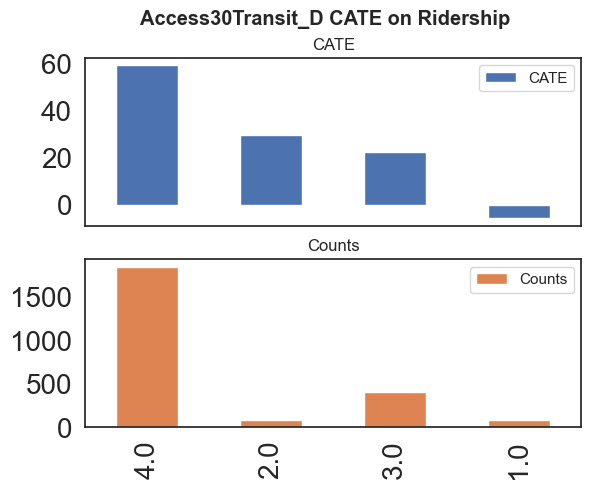

In [92]:
plot_column_CATE(column='Access30Transit_D')